### K-Means Project

#### Importing Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data_files/Pharmaceuticals.csv')

#### Data Analysis

In [ ]:
df.info()          #getting an understanding of the data. I see there are 21 entries and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Symbol                 21 non-null     object 
 1   Name                   21 non-null     object 
 2   Market_Cap             21 non-null     float64
 3   Beta                   21 non-null     float64
 4   PE_Ratio               21 non-null     float64
 5   ROE                    21 non-null     float64
 6   ROA                    21 non-null     float64
 7   Asset_Turnover         21 non-null     float64
 8   Leverage               21 non-null     float64
 9   Rev_Growth             21 non-null     float64
 10  Net_Profit_Margin      21 non-null     float64
 11  Median_Recommendation  21 non-null     object 
 12  Location               21 non-null     object 
 13  Exchange               21 non-null     object 
dtypes: float64(9), object(5)
memory usage: 2.4+ KB


In [ ]:
df.head()     #visualizing the data

,Symbol,Name,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Median_Recommendation,Location,Exchange
0,ABT,Abbott Laboratories,68.44,0.32,24.7,26.4,11.8,0.7,0.42,7.54,16.1,Moderate Buy,US,NYSE
1,AGN,"Allergan, Inc.",7.58,0.41,82.5,12.9,5.5,0.9,0.60,9.16,5.5,Moderate Buy,CANADA,NYSE
2,AHM,Amersham plc,6.30,0.46,20.7,14.9,7.8,0.9,0.27,7.05,11.2,Strong Buy,UK,NYSE
3,AZN,AstraZeneca PLC,67.63,0.52,21.5,27.4,15.4,0.9,0.00,15.00,18.0,Moderate Sell,UK,NYSE
4,AVE,Aventis,47.16,0.32,20.1,21.8,7.5,0.6,0.34,26.81,12.9,Moderate Buy,FRANCE,NYSE


#### Data Exploration

In [ ]:
df['Location'].unique()               #companines are from 7 difference countries

array(['US', 'CANADA', 'UK', 'FRANCE', 'GERMANY', 'IRELAND',
       'SWITZERLAND'], dtype=object)

In [ ]:
df['Exchange'].unique()               #companines are from 7 difference countries

array(['NYSE', 'NASDAQ', 'AMEX'], dtype=object)

#### Preparing Data For Model

In [ ]:
df_nums = df.drop(['Symbol', 'Name', 'Median_Recommendation', 'Location', 'Exchange'],axis=1)     #dropping none numercial values

In [ ]:
df_strings = df[['Median_Recommendation', 'Location', 'Exchange']]
df_strings.head()

,Median_Recommendation,Location,Exchange
0,Moderate Buy,US,NYSE
1,Moderate Buy,CANADA,NYSE
2,Strong Buy,UK,NYSE
3,Moderate Sell,UK,NYSE
4,Moderate Buy,FRANCE,NYSE


In [ ]:
# scaling data

scaler = MinMaxScaler()

for col in df_nums.columns:

  scaler.fit(df_nums[[col]])
  df_nums[col] = scaler.transform(df_nums[[col]])

df_nums.head()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
0,0.341756,0.150538,0.267427,0.381356,0.550265,0.500,0.119658,0.286517,0.589520
1,0.036019,0.247312,1.000000,0.152542,0.216931,0.750,0.170940,0.329856,0.126638
2,0.029589,0.301075,0.216730,0.186441,0.338624,0.750,0.076923,0.273408,0.375546
3,0.337687,0.365591,0.226869,0.398305,0.740741,0.750,0.000000,0.486089,0.672489
4,0.234854,0.150538,0.209125,0.303390,0.322751,0.375,0.096866,0.802033,0.449782


In [ ]:
#sns.pairplot(df_nums[['Market_Cap', 'Beta', 'PE_Ratio', 'ROE', 'ROA', 'Asset_Turnover', 'Leverage', 'Rev_Growth', 'Net_Profit_Margin']])

##### Task A: Use only the numerical variables (1 to 9) to cluster the 21 firms. Justify the various choices made in conducting the cluster analysis, such as weights for different variables, the specific clustering algorithm(s) used, the number of clusters formed, and so on.

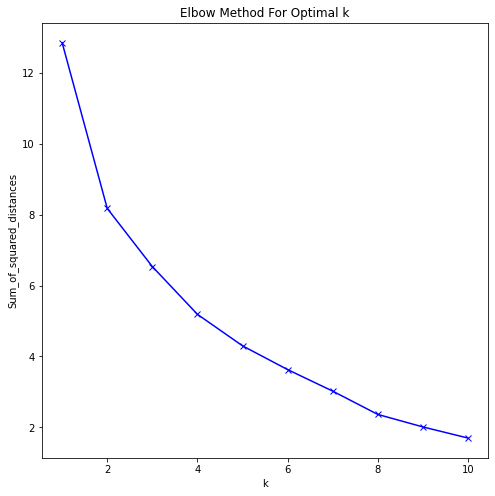

In [ ]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, algorithm = 'auto')
    km = km.fit(df_nums)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8, 8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#Using the auto algorithm we get a sum of squared distance of about 5 at the elbow, k = 4

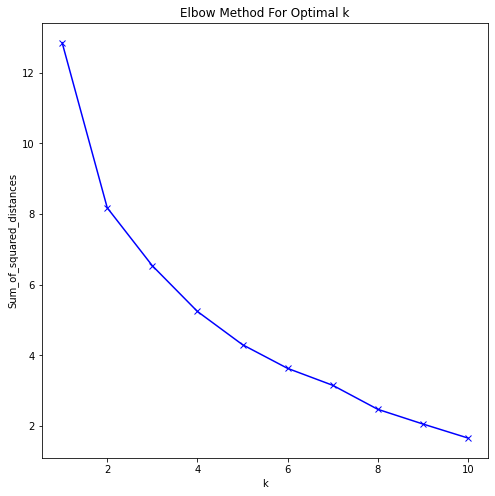

In [ ]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, algorithm = 'full')
    km = km.fit(df_nums)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8, 8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#Using the full algorithm we get a sum of squared distance of about 5 at the elbow, k = 4

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:968: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  RuntimeWarning,


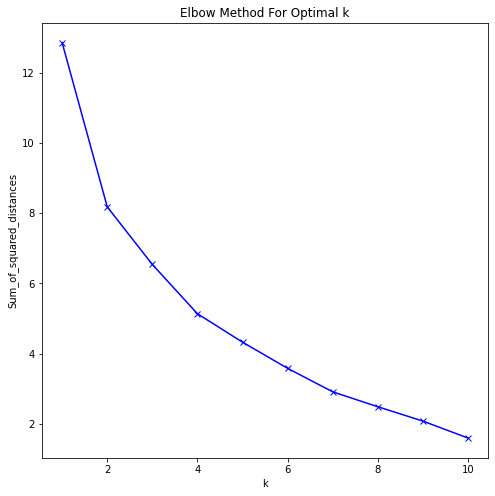

In [ ]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k, algorithm = 'elkan')
    km = km.fit(df_nums)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(8, 8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#Using the elkan algorithm we get a sum of squared distance of about 5 at the elbow, k = 4

##### After trying the 3 different algorithms for Kmeans, I chose the auto algorithm. Each of the 3 algorithms resulted in similar charts.1 The numerical values have been normalized so each play an equal role in the model. The number of clusters to used I determine by the "elbow method", this is when we visually look at the charts above and look for the bend in the sum of squared distance. We know that is the right number of categories because if we chose any ks to the left we wont have enough categories (underfit), if we chose any ks to the right of the elbow we will have too many categories (overfit).

##### Task B: Interpret the clusters with respect to the numerical variables used in forming the clusters.

In [ ]:
#Adding the predictions to a column for visualization

km = KMeans(n_clusters=4, algorithm = 'auto')
km = km.fit(df_nums)
y_predict = km.fit_predict(df_nums)
df_nums['Category'] = y_predict
df_nums.head()

,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Category
0,0.341756,0.150538,0.267427,0.381356,0.550265,0.500,0.119658,0.286517,0.589520,2
1,0.036019,0.247312,1.000000,0.152542,0.216931,0.750,0.170940,0.329856,0.126638,0
2,0.029589,0.301075,0.216730,0.186441,0.338624,0.750,0.076923,0.273408,0.375546,0
3,0.337687,0.365591,0.226869,0.398305,0.740741,0.750,0.000000,0.486089,0.672489,2
4,0.234854,0.150538,0.209125,0.303390,0.322751,0.375,0.096866,0.802033,0.449782,1


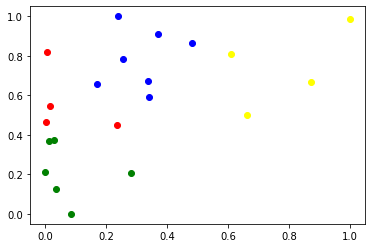

In [ ]:
#Visualizing the grouping. User can change the X / Y Axis to see different relationships.

columns_list = {
    1: 'Market_Cap',
    2: 'Beta',
    3: 'PE_Ratio',
    4: 'ROE',
    5: 'ROA',
    6: 'Asset_Turnover',
    7: 'Leverage',
    8: 'Rev_Growth',
    9: 'Net_Profit_Margin'}


X_axis = columns_list.get(1)
Y_axis = columns_list.get(9)

df1 = df_nums[df_nums.Category==0]
df2 = df_nums[df_nums.Category==1]
df3 = df_nums[df_nums.Category==2]
df4 = df_nums[df_nums.Category==3]



plt.scatter(df1[X_axis],df1[Y_axis],color='blue')
plt.scatter(df2[X_axis],df2[Y_axis],color='green')
plt.scatter(df3[X_axis],df3[Y_axis],color='yellow')
plt.scatter(df4[X_axis],df4[Y_axis],color='red')

##### Market_Cap / Net_Profit_Margin : Higher Net_Profit_Margins separates the reds and greens. The market cap is separate by low (blue) / medium (red) / high (yellow). 

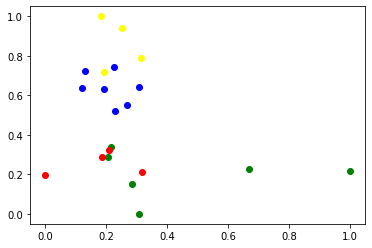

In [ ]:
X_axis = columns_list.get(3)
Y_axis = columns_list.get(5)

df1 = df_nums[df_nums.Category==0]
df2 = df_nums[df_nums.Category==1]
df3 = df_nums[df_nums.Category==2]
df4 = df_nums[df_nums.Category==3]



plt.scatter(df1[X_axis],df1[Y_axis],color='blue')
plt.scatter(df2[X_axis],df2[Y_axis],color='green')
plt.scatter(df3[X_axis],df3[Y_axis],color='yellow')
plt.scatter(df4[X_axis],df4[Y_axis],color='red')

##### PE_Ratio / ROA: On the Y-axis (ROA) we see a clear separation between the yellow, red and blue. Then on the X-axis we see a clear separation between the red and green.

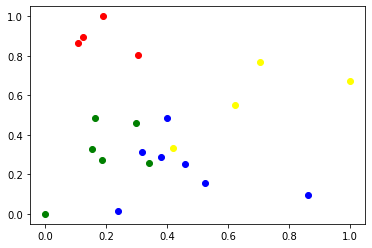

In [ ]:
X_axis = columns_list.get(4)
Y_axis = columns_list.get(8)

df1 = df_nums[df_nums.Category==0]
df2 = df_nums[df_nums.Category==1]
df3 = df_nums[df_nums.Category==2]
df4 = df_nums[df_nums.Category==3]



plt.scatter(df1[X_axis],df1[Y_axis],color='blue')
plt.scatter(df2[X_axis],df2[Y_axis],color='green')
plt.scatter(df3[X_axis],df3[Y_axis],color='yellow')
plt.scatter(df4[X_axis],df4[Y_axis],color='red')

##### ROE / Rev_Growth: Here it seems as if each category is taking its own quandrant of the chart. Perhaps the best one. The blue seems to favor a bit towards the middle, as more data came in if that were to repeat then I would look for another comparison to visualize. 

##### Other Notable Pairs to Visualize the groupings:

##### ROA / Asset_Turnover

##### ROA / Rev_Growth

##### ROA / Net_Profit_Margin

##### Rev_Growth / Net_Profit_Margin

##### Task C: Is there a pattern in the clusters with respect to the numerical variables (10 to 12)? (those not used in forming the clusters) 

In [ ]:
df_dum_strings = pd.get_dummies(df_strings)
df_dum_strings.head()

,Median_Recommendation_Hold,Median_Recommendation_Moderate Buy,Median_Recommendation_Moderate Sell,Median_Recommendation_Strong Buy,Location_CANADA,Location_FRANCE,Location_GERMANY,Location_IRELAND,Location_SWITZERLAND,Location_UK,Location_US,Exchange_AMEX,Exchange_NASDAQ,Exchange_NYSE
0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,1,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [ ]:
km = KMeans(n_clusters=4, algorithm = 'auto')
km = km.fit(df_dum_strings)
y_predict = km.fit_predict(df_dum_strings)
df_dum_strings['Category'] = y_predict
df_dum_strings.head()

,Median_Recommendation_Hold,Median_Recommendation_Moderate Buy,Median_Recommendation_Moderate Sell,Median_Recommendation_Strong Buy,Location_CANADA,Location_FRANCE,Location_GERMANY,Location_IRELAND,Location_SWITZERLAND,Location_UK,Location_US,Exchange_AMEX,Exchange_NASDAQ,Exchange_NYSE,Category
0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,3
3,0,0,1,0,0,0,0,0,0,1,0,0,0,1,3
4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
df_companies_info = df[['Symbol', 'Name', 'Median_Recommendation']]

df_dum_strings = pd.concat([df_companies_info, df_dum_strings], axis = 1)
df_dum_strings.head()

,Symbol,Name,Median_Recommendation,Median_Recommendation_Hold,Median_Recommendation_Moderate Buy,Median_Recommendation_Moderate Sell,Median_Recommendation_Strong Buy,Location_CANADA,Location_FRANCE,Location_GERMANY,Location_IRELAND,Location_SWITZERLAND,Location_UK,Location_US,Exchange_AMEX,Exchange_NASDAQ,Exchange_NYSE,Category
0,ABT,Abbott Laboratories,Moderate Buy,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,AGN,"Allergan, Inc.",Moderate Buy,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,AHM,Amersham plc,Strong Buy,0,0,0,1,0,0,0,0,0,1,0,0,0,1,3
3,AZN,AstraZeneca PLC,Moderate Sell,0,0,1,0,0,0,0,0,0,1,0,0,0,1,3
4,AVE,Aventis,Moderate Buy,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

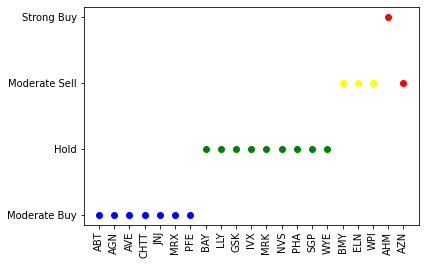

In [ ]:
df1 = df_dum_strings[df_dum_strings.Category==0]
df2 = df_dum_strings[df_dum_strings.Category==1]
df3 = df_dum_strings[df_dum_strings.Category==2]
df4 = df_dum_strings[df_dum_strings.Category==3]



plt.scatter(df1['Symbol'],df1['Median_Recommendation'],color='blue')
plt.scatter(df2['Symbol'],df2['Median_Recommendation'],color='green')
plt.scatter(df3['Symbol'],df3['Median_Recommendation'],color='yellow')
plt.scatter(df4['Symbol'],df4['Median_Recommendation'],color='red')
plt.xticks(rotation = 90)

##### Good Grouping visualizing the Median Recommendations

##### Task D: Provide an appropriate name for each cluster using any or all of the variables in the dataset. 

In [ ]:
#Using all the variables. 

df_companies = df[['Symbol', 'Name']]
df_dum_strings = df_dum_strings.iloc[: , 3:7]

df_all = pd.concat([df_dum_strings, df_nums], axis = 1)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Median_Recommendation_Hold           21 non-null     uint8  
 1   Median_Recommendation_Moderate Buy   21 non-null     uint8  
 2   Median_Recommendation_Moderate Sell  21 non-null     uint8  
 3   Median_Recommendation_Strong Buy     21 non-null     uint8  
 4   Market_Cap                           21 non-null     float64
 5   Beta                                 21 non-null     float64
 6   PE_Ratio                             21 non-null     float64
 7   ROE                                  21 non-null     float64
 8   ROA                                  21 non-null     float64
 9   Asset_Turnover                       21 non-null     float64
 10  Leverage                             21 non-null     float64
 11  Rev_Growth                        

##### Above are the variables I am using

In [ ]:
km = KMeans(n_clusters=4)
km = km.fit(df_all)
y_predict = km.fit_predict(df_all)
df_all['Category'] = y_predict
df_all.head()

,Median_Recommendation_Hold,Median_Recommendation_Moderate Buy,Median_Recommendation_Moderate Sell,Median_Recommendation_Strong Buy,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin,Category
0,0,1,0,0,0.341756,0.150538,0.267427,0.381356,0.550265,0.500,0.119658,0.286517,0.589520,2
1,0,1,0,0,0.036019,0.247312,1.000000,0.152542,0.216931,0.750,0.170940,0.329856,0.126638,1
2,0,0,0,1,0.029589,0.301075,0.216730,0.186441,0.338624,0.750,0.076923,0.273408,0.375546,1
3,0,0,1,0,0.337687,0.365591,0.226869,0.398305,0.740741,0.750,0.000000,0.486089,0.672489,2
4,0,1,0,0,0.234854,0.150538,0.209125,0.303390,0.322751,0.375,0.096866,0.802033,0.449782,3


##### Exploring the clusters:

In [ ]:
df_companies = df[['Symbol', 'Name']]

df_all = pd.concat([df_companies, df_all], axis = 1)
df_all.columns

Index(['Symbol', 'Name', 'Median_Recommendation_Hold',
       'Median_Recommendation_Moderate Buy',
       'Median_Recommendation_Moderate Sell',
       'Median_Recommendation_Strong Buy', 'Market_Cap', 'Beta', 'PE_Ratio',
       'ROE', 'ROA', 'Asset_Turnover', 'Leverage', 'Rev_Growth',
       'Net_Profit_Margin', 'Category'],
      dtype='object')

In [ ]:
columns_list1 = {
    1: 'Market_Cap',
    2: 'Beta',
    3: 'PE_Ratio',
    4: 'ROE',
    5: 'ROA',
    6: 'Asset_Turnover',
    7: 'Leverage',
    8: 'Rev_Growth',
    9: 'Net_Profit_Margin', 
    10: 'Symbol'}

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

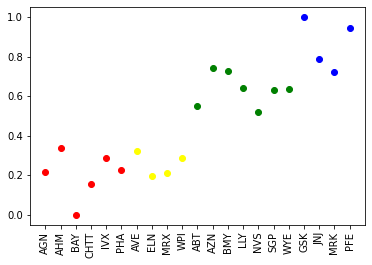

In [ ]:
X_axis = columns_list1.get(10)
Y_axis = columns_list1.get(5)

df1 = df_all[df_all.Category==0]
df2 = df_all[df_all.Category==1]
df3 = df_all[df_all.Category==2]
df4 = df_all[df_all.Category==3]


plt.scatter(df2[X_axis],df2[Y_axis],color='red')
plt.scatter(df4[X_axis],df4[Y_axis],color='yellow')
plt.scatter(df3[X_axis],df3[Y_axis],color='green')
plt.scatter(df1[X_axis],df1[Y_axis],color='blue')


plt.xticks(rotation = 90)

##### Here we can see a very strong positive coorelation when comparing the Symbols of the companies and the Return on Assets. 

In [ ]:
#Plotting the real data
ROA_data = df.iloc[: , 6]
df2 = df_all[['Symbol', 'Category']]

ROA = pd.concat([df2, ROA_data], axis = 1)
ROA.head()

,Symbol,Category,ROA
0,ABT,2,11.8
1,AGN,1,5.5
2,AHM,1,7.8
3,AZN,2,15.4
4,AVE,3,7.5


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

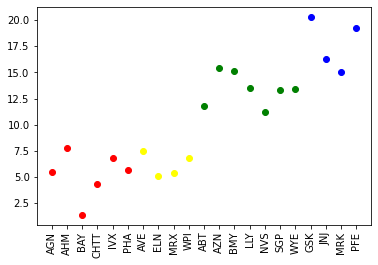

In [ ]:
X_axis = columns_list1.get(10)
Y_axis = columns_list1.get(5)

df1 = ROA[ROA.Category==0]
df2 = ROA[ROA.Category==1]
df3 = ROA[ROA.Category==2]
df4 = ROA[ROA.Category==3]


plt.scatter(df2[X_axis],df2[Y_axis],color='red')
plt.scatter(df4[X_axis],df4[Y_axis],color='yellow')
plt.scatter(df3[X_axis],df3[Y_axis],color='green')
plt.scatter(df1[X_axis],df1[Y_axis],color='blue')


plt.xticks(rotation = 90)

##### Note the difference in the Y-axis. I plotted this to see the real values compared to the groupings. 

#### I would label both the red and yellow clusters as having low Return on Assets. Green as good or medium and the blue as excellent or high.



##### Interesting article on ROA: https://www.investopedia.com/terms/r/returnonassets.asp